In [4]:
import albumentations as A
import cv2
import os
import random
import matplotlib.pyplot as plt

In [5]:
def augment_images(input_dir, output_dir, num_iterations):
    # Pixel-level transforms
    pixel_transforms = [
        A.AdvancedBlur(p=1.0),
        A.Blur(blur_limit=(3, 7), p=1.0),
        # A.CLAHE(p=1.0),   # Histogram?
        A.ChannelDropout(channel_drop_range=(1, 1), fill_value=0, p=1.0),
        A.ChannelShuffle(p=1.0),
        A.ChromaticAberration(p=1.0, ChromaticAberrationMode=random),
        A.ColorJitter(p=1.0),
        A.Defocus(p=1.0),
        A.Downscale(scale_min=0.25, scale_max=0.75, p=1.0),
        A.Emboss(p=1.0),
        # A.Equalize(p=1.0),  # Histogram?
        A.FancyPCA(alpha=0.1, p=1.0),
        # A.FromFloat(p=1.0),     # DONT USE????
        A.GaussNoise(var_limit=(10.0, 50.0), p=1.0),
        A.GaussianBlur(blur_limit=(3, 7), p=1.0),
        A.GlassBlur(p=1.0),
        # A.HistogramMatching(p=1.0),   # DONT USE????
        A.HueSaturationValue(p=1.0),
        A.ISONoise(color_shift=(0.01, 0.05), intensity=(0.1, 0.5), p=1.0),
        # A.ImageCompression(quality_lower=10, p=1.0),   # ONLY WORKS WITH JPEG OR WEBP
        A.InvertImg(p=1.0),
        A.MedianBlur(blur_limit=(3, 7), p=1.0),
        A.MotionBlur(blur_limit=(3, 7), p=1.0),
        A.MultiplicativeNoise(p=1.0),
        A.Normalize(p=1.0),
        # A.PixelDistributionAdaptation(transform_type='pca', p=1.0),   # DONT USE????
        A.Posterize(p=1.0),
        A.RGBShift(p=1.0),
        A.RandomBrightnessContrast(p=1.0),
        A.RandomFog(fog_coef_lower=0.3, fog_coef_upper=0.5, p=1.0),
        A.RandomGamma(p=1.0),
        A.RandomGravel(p=1.0),
        A.RandomRain(p=1.0),
        A.RandomShadow(shadow_roi=(0, 0.5, 1, 1), p=1.0),
        A.RandomSnow(p=1.0),
        A.RandomSunFlare(p=1.0),
        A.RandomToneCurve(scale=0.5, p=1.0),
        A.RingingOvershoot(p=1.0),
        A.Sharpen(p=1.0),
        A.Solarize(p=1.0),
        A.Spatter(p=1.0),
        A.Superpixels(p=1.0),
        # A.TemplateTransform(p=1.0),   # DONT USE TEMPLATES???
        # A.ToFloat(always_apply=False, p=1.0),  # DONT USE????
        A.ToGray(p=1.0),
        # A.ToRGB(p=1.0),
        A.ToSepia(p=1.0),
        A.UnsharpMask(threshold=200, p=1.0),
        A.ZoomBlur(p=1.0),
    ]

     # Iterate through each image in the input directory
    for filename in os.listdir(input_dir):
        # Read the image
        image = cv2.imread(os.path.join(input_dir, filename))
        height, width, _ = image.shape

    # Calculate percentage of width and height for random crop
    crop_height_percent = 0.8  # 80% of the image height
    crop_width_percent = 0.8  # 80% of the image width

    # Calculate crop size based on percentage
    crop_height = int(height * crop_height_percent)
    crop_width = int(width * crop_width_percent)

    # Spatial-level transforms
    spatial_transforms = [
        A.Affine(p=1.0),
        # A.BBoxSafeRandomCrop(p=1.0),     # DONT USE ?????
        A.CenterCrop(height=100, width=100, p=1.0),
        A.CoarseDropout(p=1.0),
        A.Crop(x_min=0, y_min=0, x_max=width, y_max=height, p=1.0),
        A.CropAndPad(p=1.0, px=50, pad_mode=cv2.BORDER_CONSTANT, sample_independently=True),
        # A.CropNonEmptyMaskIfExists(height=10, width=10, p=1.0),    # DONT USE???
        A.D4(p=1.0),
        A.ElasticTransform(p=1.0),
        A.Flip(p=1.0),
        A.GridDistortion(p=1.0),
        A.GridDropout(p=1.0),
        A.HorizontalFlip(p=1.0),
        # A.Lambda(p=1.0),      # DONT USE????
        A.LongestMaxSize(p=1.0),
        # A.MaskDropout(p=1.0),    # DONT USE?????
        A.Morphological(p=1.0),
        # A.NoOp(p=1.0),    # DONT USE
        A.OpticalDistortion(p=1.0),
        A.PadIfNeeded(p=1.0),
        A.Perspective(p=1.0),
        # A.PiecewiseAffine(p=1.0),  # DONT USE BECAUSE OF ELASTIC????
        A.PixelDropout(p=1.0),
        A.RandomCrop(height=crop_height, width=crop_width, p=1.0),
        A.RandomCropFromBorders(p=1.0),
        A.RandomGridShuffle(p=1.0),
        A.RandomResizedCrop(height=height, width=width, p=1.0),
        A.RandomRotate90(p=1.0),
        A.RandomScale(p=1.0),
        # A.RandomSizedBBoxSafeCrop(p=1.0),   # DONT USE BOUNDING BOX????
        # A.RandomSizedCrop(p=1.0, size=(height, width), min_max_height=[height-1, width-1]),   # DONT USE???
        # A.Resize(p=1.0),    # DONT USE?????
        A.Rotate(p=1.0),
        A.SafeRotate(p=1.0),
        A.ShiftScaleRotate(p=1.0),
        A.SmallestMaxSize(p=1.0),
        A.Transpose(p=1.0),
        A.VerticalFlip(p=1.0),
        A.XYMasking(num_masks_x=10, num_masks_y=10, mask_x_length=10, mask_y_length=10, p=1.0),
    ]

    # # Iterate through each image in the input directory
    # for filename in os.listdir(input_dir):
    #     # Read the image
    #     image = cv2.imread(os.path.join(input_dir, filename))

    #     # Iterate through the number of iterations specified
    #     for i in range(num_iterations):
    #         # Choose random augmentation type (pixel or spatial)
    #         augmentation_type = random.choice(["pixel", "spatial"])

    #         # Choose random transformations from the selected type
    #         if augmentation_type == "pixel":
    #             chosen_transform = random.choice(pixel_transforms)
    #         else:
    #             chosen_transform = random.choice(spatial_transforms)

    #         # Apply chosen transformation
    #         augmented = chosen_transform(image=image)

    #         augmented_image = augmented["image"]
        
    
    # Iterate through each image in the input directory
    for filename in os.listdir(input_dir):
        # Read the image
        image = cv2.imread(os.path.join(input_dir, filename))

        # Display the original image
        plt.figure(figsize=(8, 4))
        plt.subplot(1, num_iterations+1, 1)
        plt.title('Original')
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.axis('off')

        # Iterate through the number of iterations specified
        for i in range(num_iterations):
            # Choose random augmentation type (pixel or spatial)
            augmentation_type = random.choice(["pixel", "spatial"])

            # Choose random transformations from the selected type
            if augmentation_type == "pixel":
                chosen_transform = random.choice(pixel_transforms)
            else:
                chosen_transform = random.choice(spatial_transforms)

            # Apply chosen transformation
            augmented = chosen_transform(image=image)

            augmented_image = augmented["image"]

            # Display the augmented image
            plt.subplot(1, num_iterations+1, i+2)
            plt.title(f'Augmented {i+1}')
            plt.imshow(cv2.cvtColor(augmented_image, cv2.COLOR_BGR2RGB))
            plt.axis('off')

        plt.show()

    # Save the augmented image
    output_filename = f"{os.path.splitext(filename)[0]}_{i+1}{os.path.splitext(filename)[1]}"
    cv2.imwrite(os.path.join(output_dir, output_filename), augmented_image)

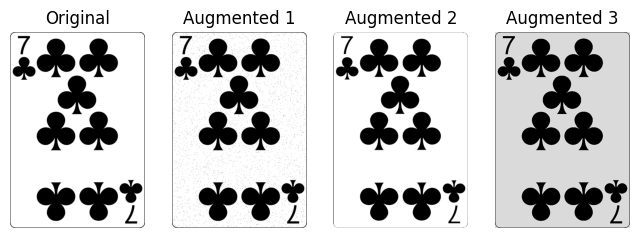

In [6]:
input_dir = "images"
output_dir = "aug_images"
num_iterations = 3  # Number of new versions of each image

# Create the output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Augment images
augment_images(input_dir, output_dir, num_iterations)